---
# Carregando Bibliotecas

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot');
mpl.rcParams['figure.dpi'] = 400

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.preprocessing   import LabelEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost         import XGBRegressor


--- 
# Carregando Dados

In [2]:
dados = pd.read_csv('datasets/precos_carros_brasil.csv')

In [3]:
dados.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [4]:
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [5]:
dados.shape

(267542, 11)

---
# Análise Exploratória dos Dados

b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes


In [6]:
# verificando se há valores ausentes
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [7]:
# verificando a quantidade de valores ausentes
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [8]:
# excluindo linhas com valores ausentes
dados.dropna(axis='index', inplace=True)

In [9]:
dados.shape

(202297, 11)

c) Verifique se há dados duplicados nos dados

In [10]:
# verificando se há dados duplicados
dados.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
202292    False
202293    False
202294    False
202295    False
202296    False
Length: 202297, dtype: bool

O dados não possuem valores duplicados.

d) Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)


In [11]:
# criando categorias para separar colunas numéricas e categóricas
cols_numericas   = [col for col in dados.columns if dados[col].dtype != 'object']
cols_categoricas = [col for col in dados.columns if dados[col].dtype == 'object']

In [12]:
# resumo das variáveis numéricas
dados[cols_numericas].describe()

,year_of_reference,year_model,avg_price_brl
count,202297.000000,202297.000000,202297.000000
mean,2021.564694,2011.271527,52756.909153
std,0.571903,6.376234,51628.677716
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [13]:
# resumo das variáveis categóricas
dados[cols_categoricas].describe()


,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202297,202297,202297,202297,202297,202297,202297,202297
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,3r6c277cnqcb,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,2,44962,425,168685,161885,47420


e) Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [14]:
# contagem dos modelos por modelo
dados['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [15]:
# contagem dos modelos por marca
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33151
Renault            29192
Nissan             12090
Name: count, dtype: int64

In [16]:
# contagem dos modelos por câmbio
dados['gear'].value_counts()


gear
manual       161885
automatic     40412
Name: count, dtype: int64

In [17]:
dados['fuel'].value_counts()

fuel
Gasoline    168685
Diesel       30099
Alcohol       3513
Name: count, dtype: int64

f) Dê uma breve explicação (máximo de quatro linhas) sobre os principais resultados encontrados na Análise Exploratória dos dados

Pudemos identificar que há valores ausentes em todas as colunas. Devido a isso decidimos remover as linhas com valores ausentes.

Observa-se também que, no geral, o preço médio de um carro no Brasil custa aproximadamente $R\$ 52,756,91$. Um dos modelos mais vendidos é *Palio Week. Adv/Adv TRYON 1.8 mpi Flex*, com câmbio *manual* e motor $1.6$.

--- 
# Visualização dos Dados

a) Gere um gráfico da distribuição da quantidade de carros por marca


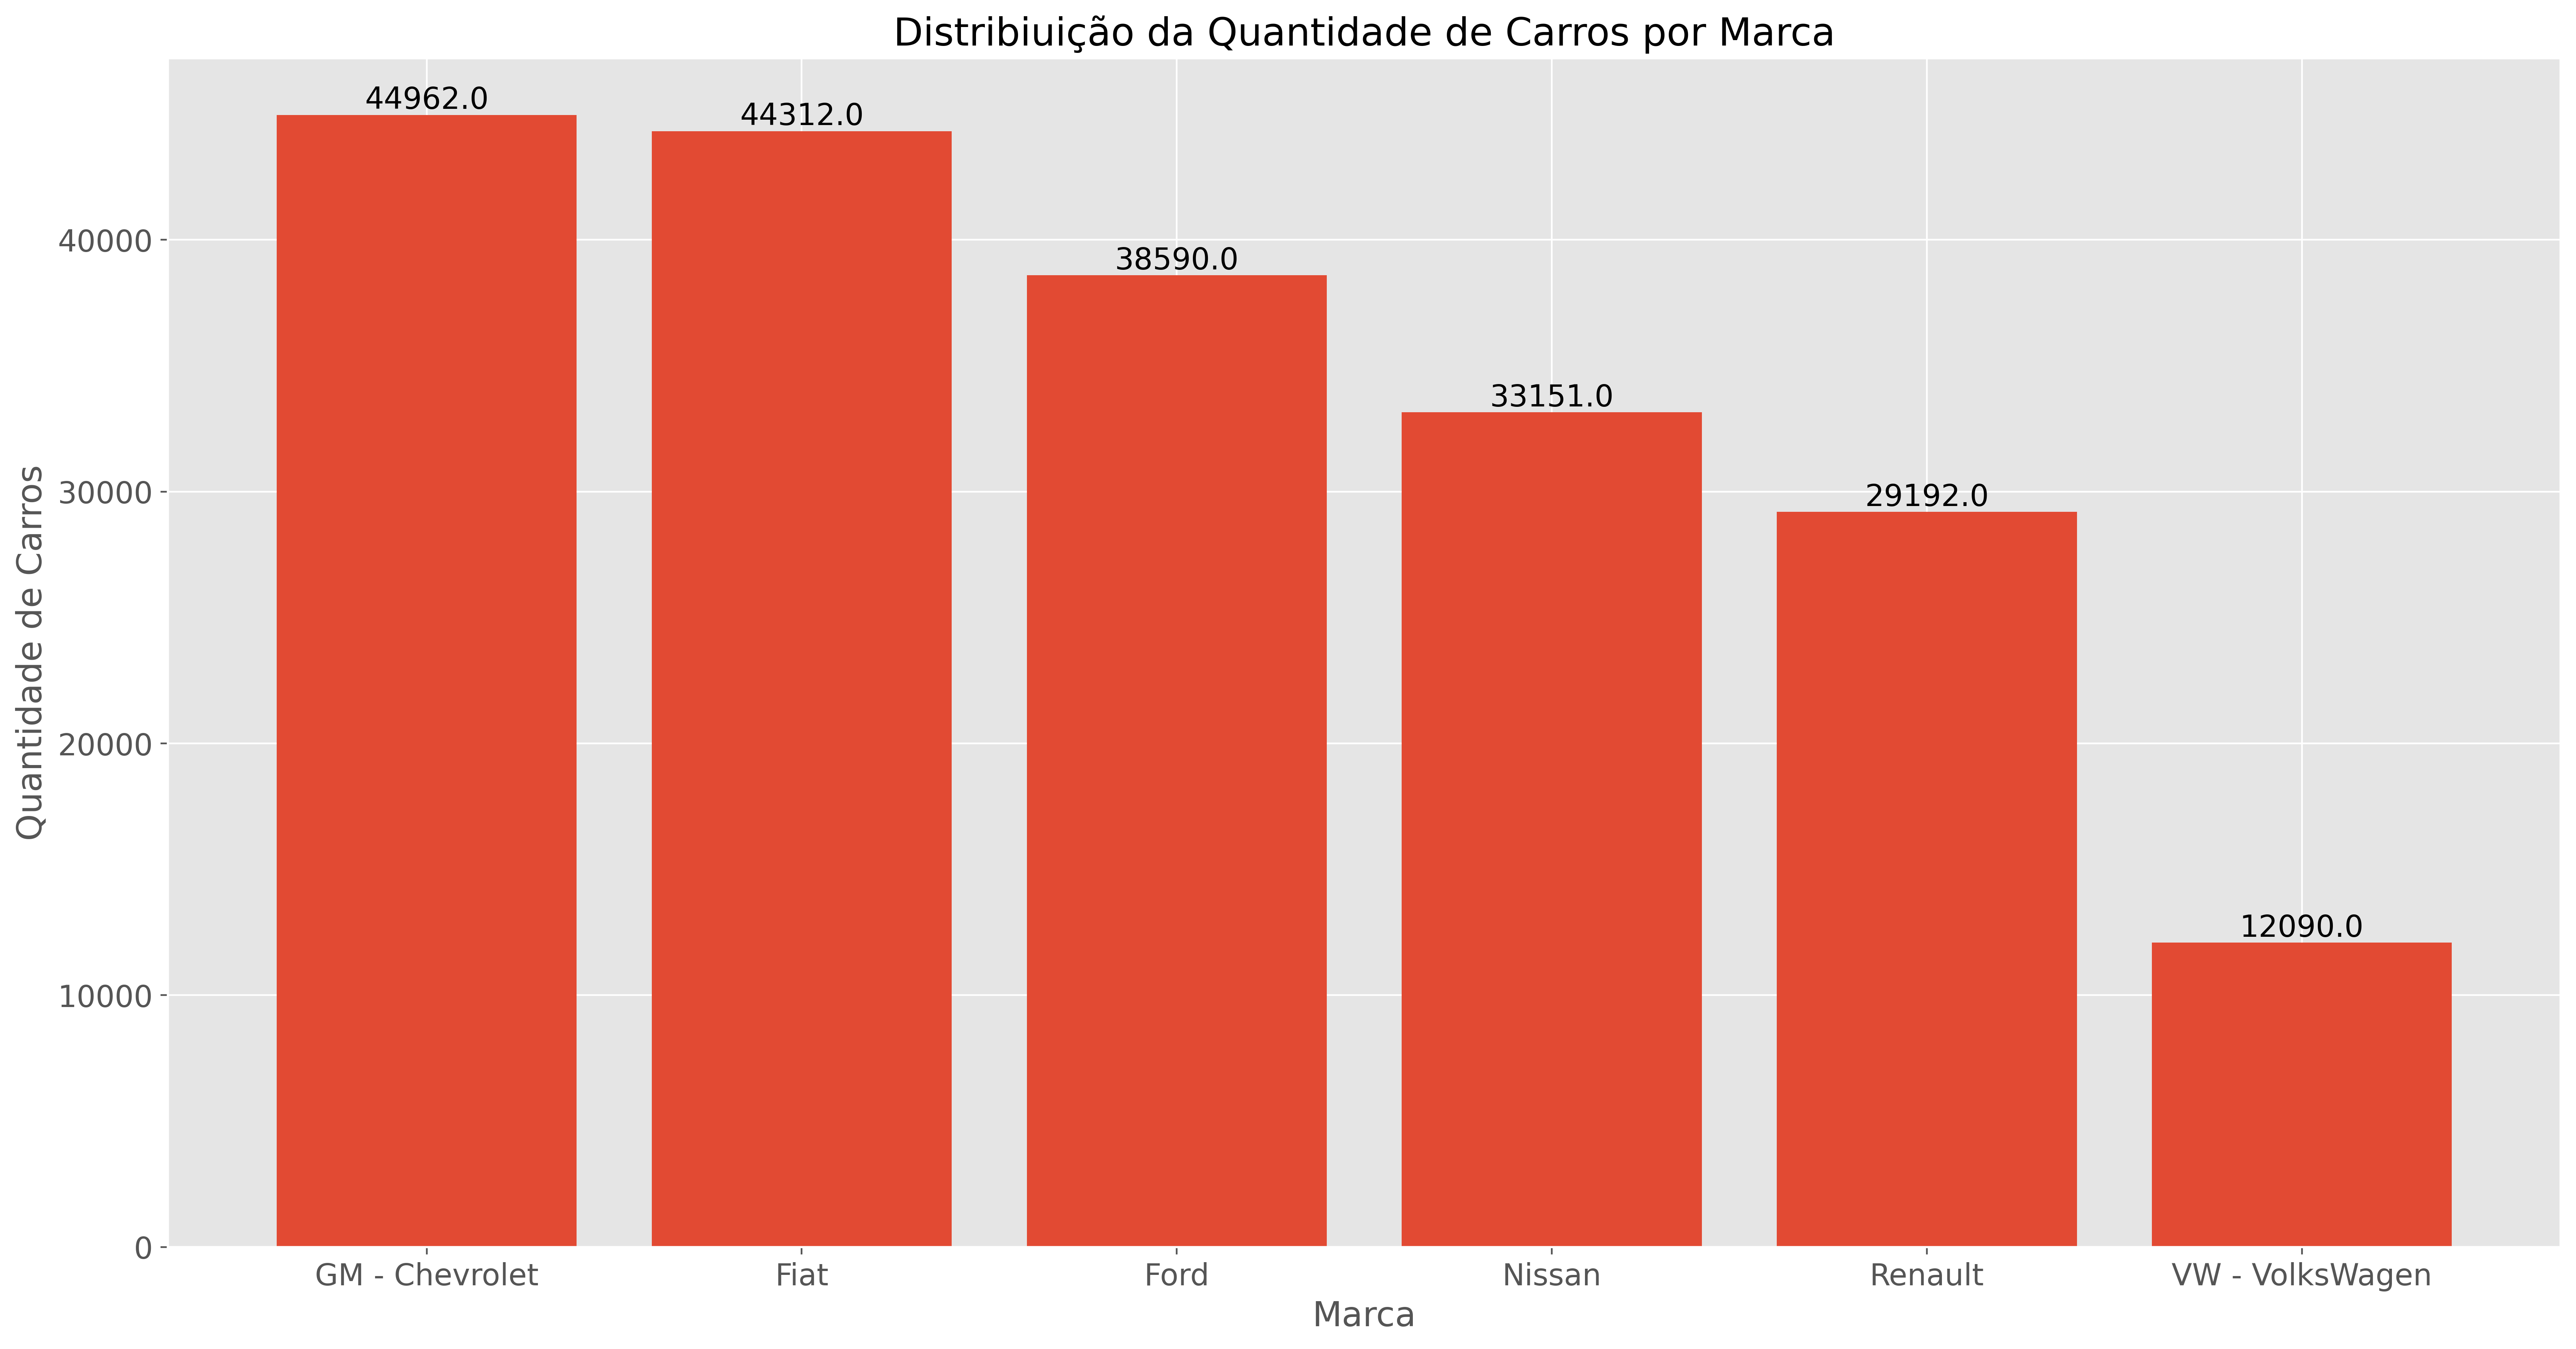

In [18]:
# visualizado distribuição da quantidade de carros por marca
plt.figure(figsize=(20,10));
grafico_1 = plt.bar(dados['brand'].unique(), dados['brand'].value_counts())
plt.title("Distribiuição da Quantidade de Carros por Marca", fontsize=18)
plt.ylabel("Quantidade de Carros", fontsize=16)
plt.xlabel("Marca", fontsize=16)

# aumentar o tamanho dos eixos
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colocando o rótulo das barras
plt.bar_label(grafico_1, fmt="%.01f", size=14, label_type='edge');


b) Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro

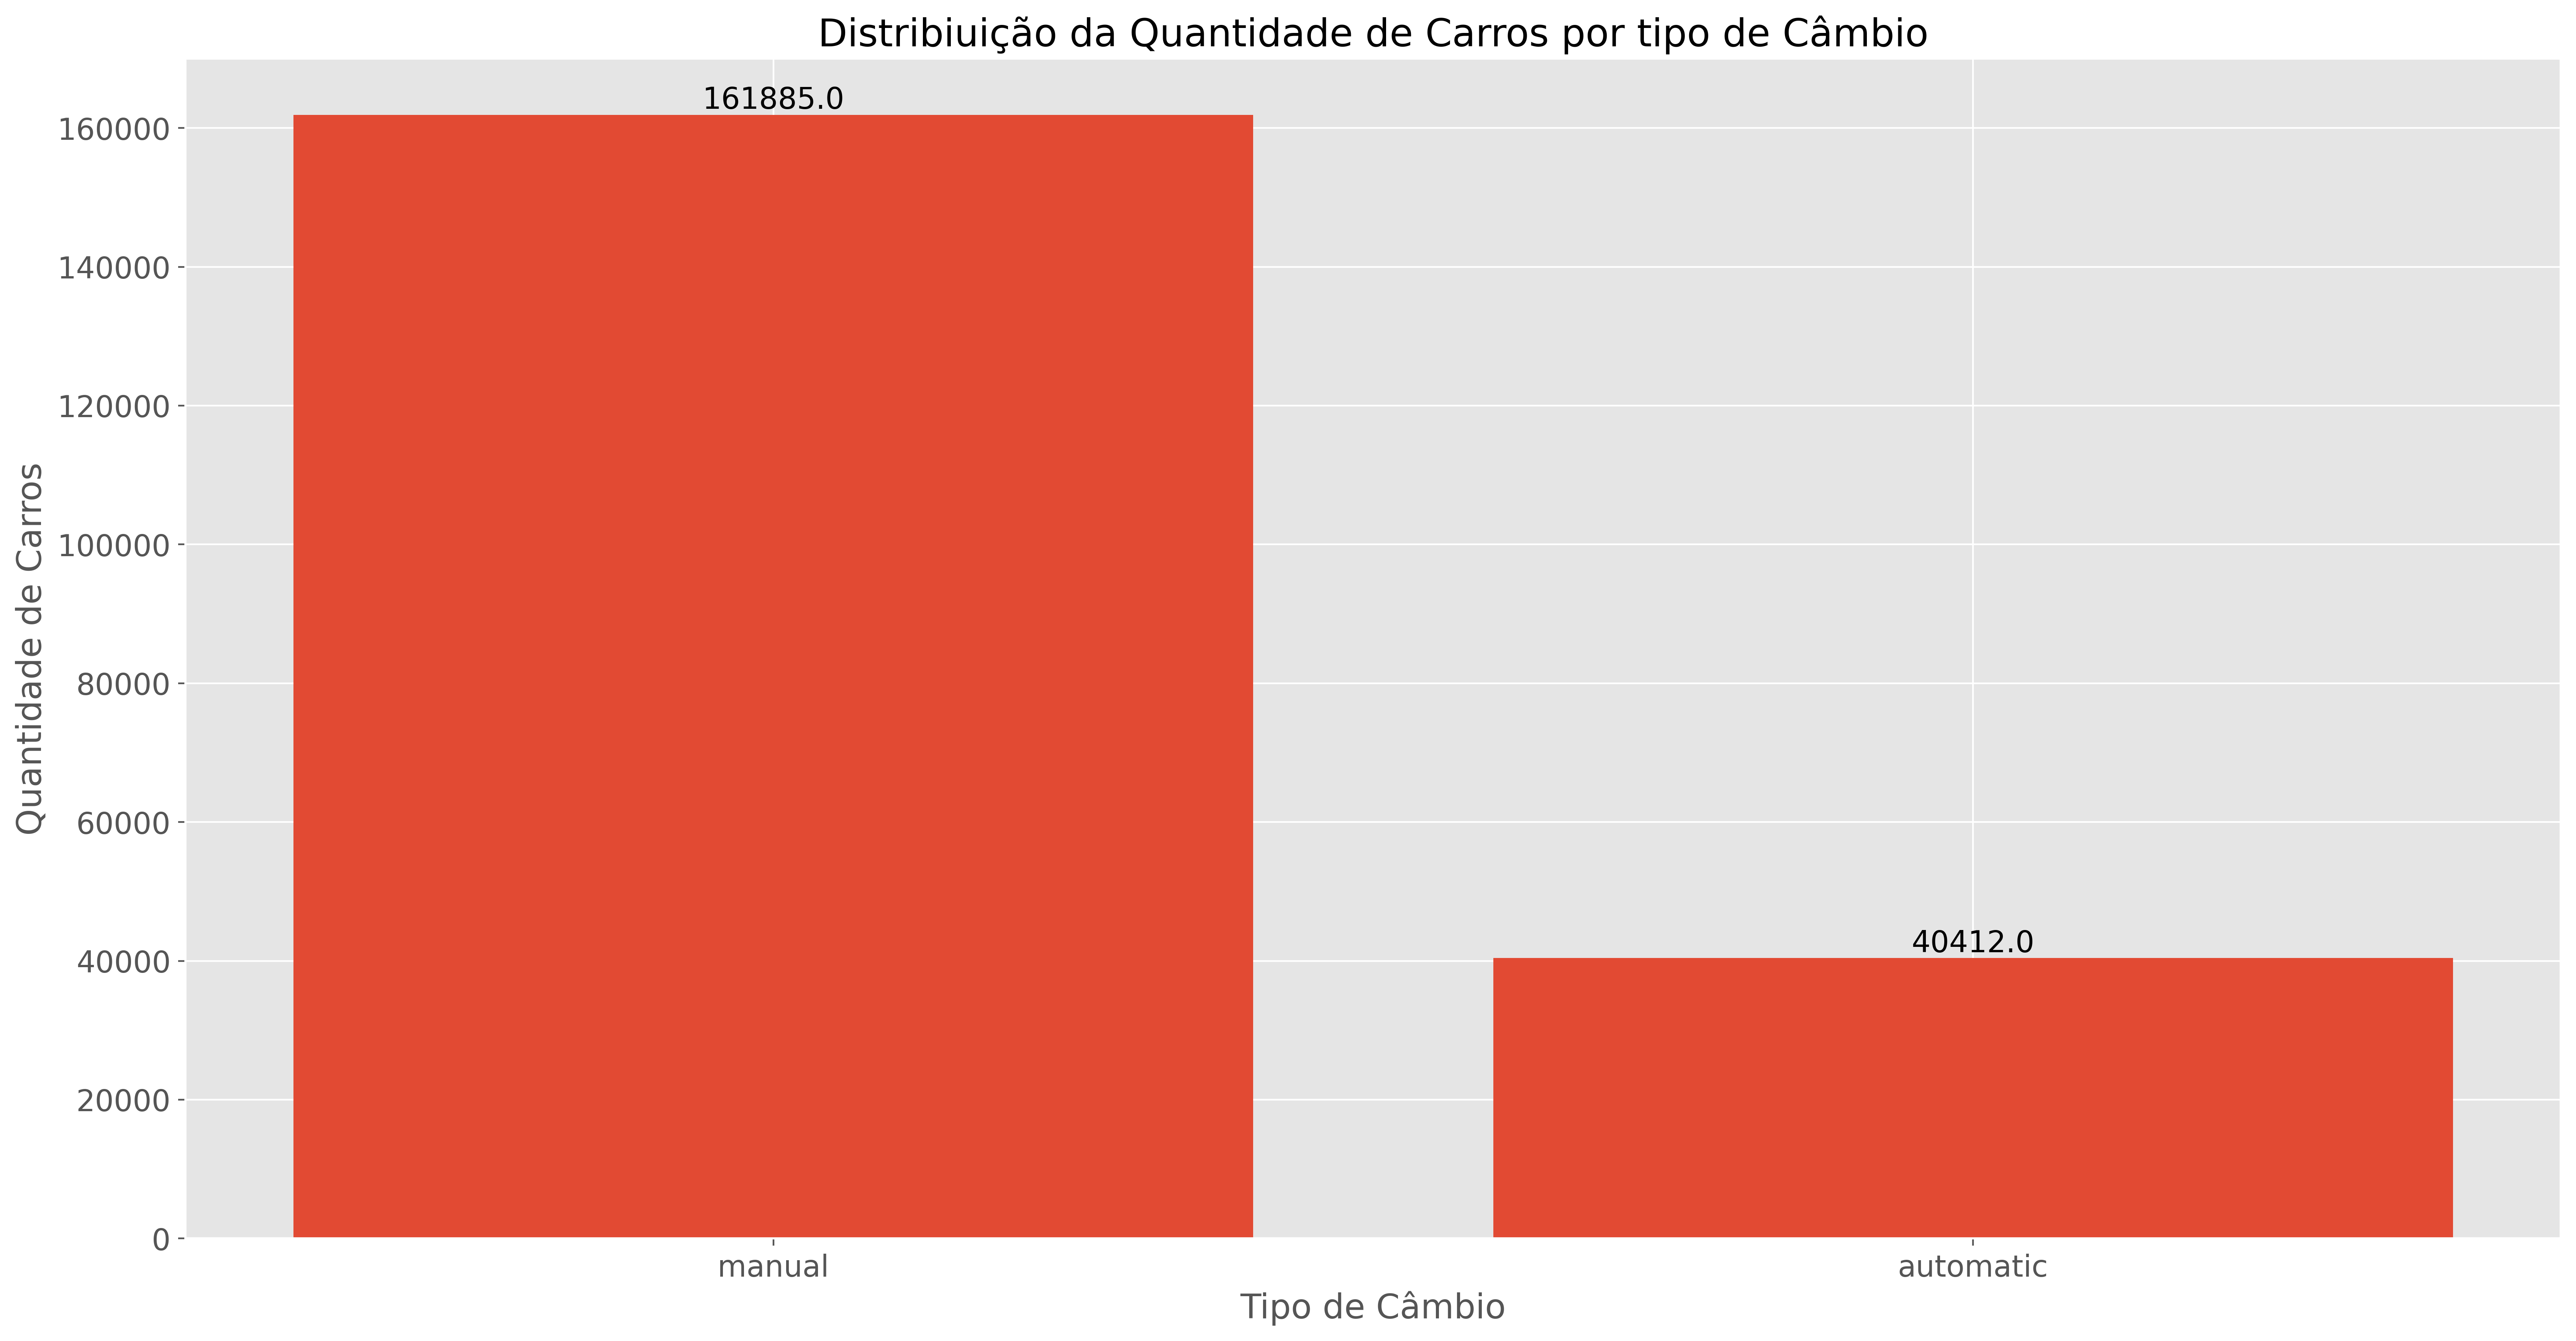

In [19]:
# visualizado distribuição da quantidade de carros por tipo de câmbio
plt.figure(figsize=(20,10));
grafico_2 = plt.bar(dados['gear'].unique(), dados['gear'].value_counts())
plt.title("Distribiuição da Quantidade de Carros por tipo de Câmbio", fontsize=18)
plt.ylabel("Quantidade de Carros", fontsize=16)
plt.xlabel("Tipo de Câmbio", fontsize=16)

# aumentar o tamanho dos eixos
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colocando o rótulo das barras
plt.bar_label(grafico_2, fmt="%.01f", size=14, label_type='edge');


c) Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)


In [20]:
# ordenando coluna month_of_reference
dados['month_of_reference'] = pd.Categorical(dados['month_of_reference'], 
                                             categories=dados['month_of_reference'].unique(), 
                                             ordered=True)
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [21]:
# coletando dados de 2022
dados_2022 = dados[dados['year_of_reference'] == 2022]
dados_2022.shape

(97798, 11)

In [22]:
# calculando a média nensal do preço dos carros
media_precos_2022 = dados_2022.groupby(['month_of_reference'])['avg_price_brl'].mean()
media_precos_2022.head(12)


month_of_reference
January      54840.270037
February     55824.519882
March        56848.951914
April        57150.037325
May          57799.763776
June         58065.611398
July         57893.997056
August       57923.544105
September    58198.936989
October      58227.410144
November     58215.626236
December     57998.054038
Name: avg_price_brl, dtype: float64

In [23]:
# resetando index
media_precos_2022 = media_precos_2022.reset_index(name='avg_price_month')
media_precos_2022.head()

,month_of_reference,avg_price_month
0,January,54840.270037
1,February,55824.519882
2,March,56848.951914
3,April,57150.037325
4,May,57799.763776


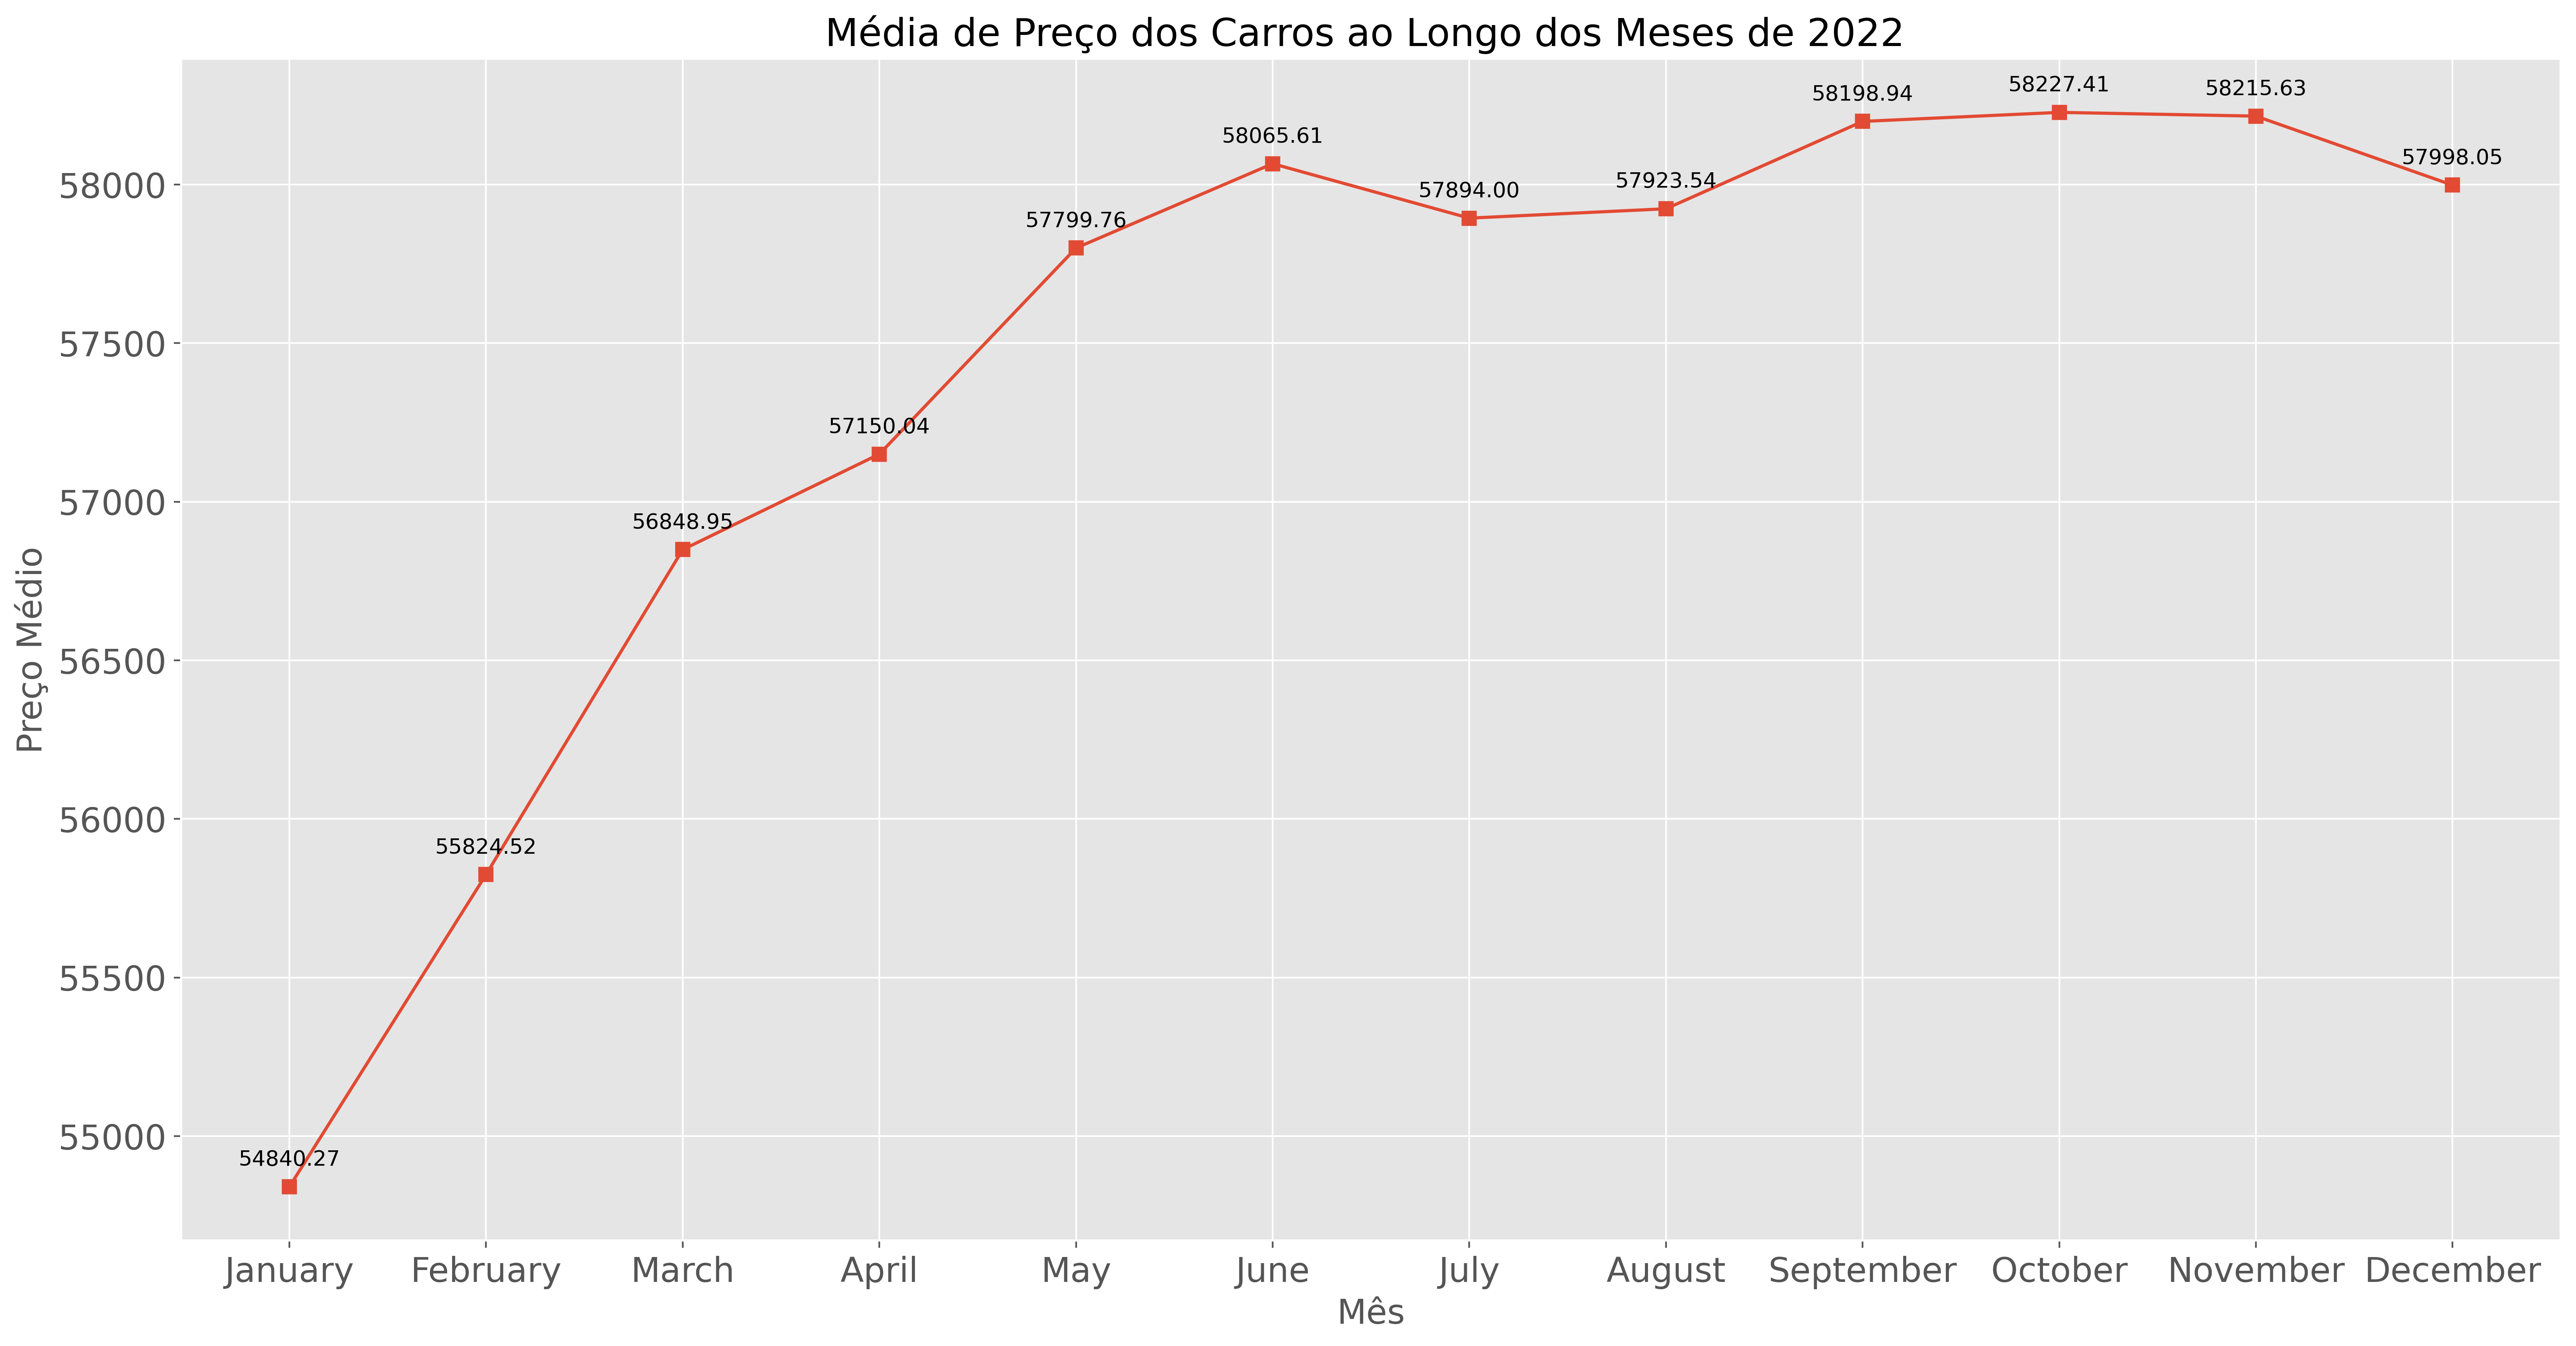

In [24]:
# visualizado o preço médio dos carros ao longo dos meses de 2022
plt.figure(figsize=(20,10));
grafico_1 = plt.plot(media_precos_2022['month_of_reference'], media_precos_2022['avg_price_month'], marker='s')
plt.title("Média de Preço dos Carros ao Longo dos Meses de 2022 ", fontsize=18)
plt.ylabel("Preço Médio", fontsize=16)
plt.xlabel("Mês", fontsize=16)

# adiciona anotações de cada ponto ao gráfico
for x, y in zip(media_precos_2022['month_of_reference'], media_precos_2022['avg_price_month']):
    label = "{:.2f}".format(y)
    plt.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
# aumentar o tamanho dos eixos
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);


d) Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem.

In [25]:
preco_marca_cambio = dados.groupby(['brand','gear'])['avg_price_brl'].mean()
preco_marca_cambio.head()

brand           gear     
Fiat            automatic    97396.801936
                manual       39694.442749
Ford            automatic    84769.106720
                manual       51784.851550
GM - Chevrolet  automatic    88156.919439
Name: avg_price_brl, dtype: float64

In [26]:
# resetando index
preco_marca_cambio = preco_marca_cambio.reset_index(name='avg_price_brand_gear')
preco_marca_cambio.head()

,brand,gear,avg_price_brand_gear
0,Fiat,automatic,97396.801936
1,Fiat,manual,39694.442749
2,Ford,automatic,84769.106720
3,Ford,manual,51784.851550
4,GM - Chevrolet,automatic,88156.919439


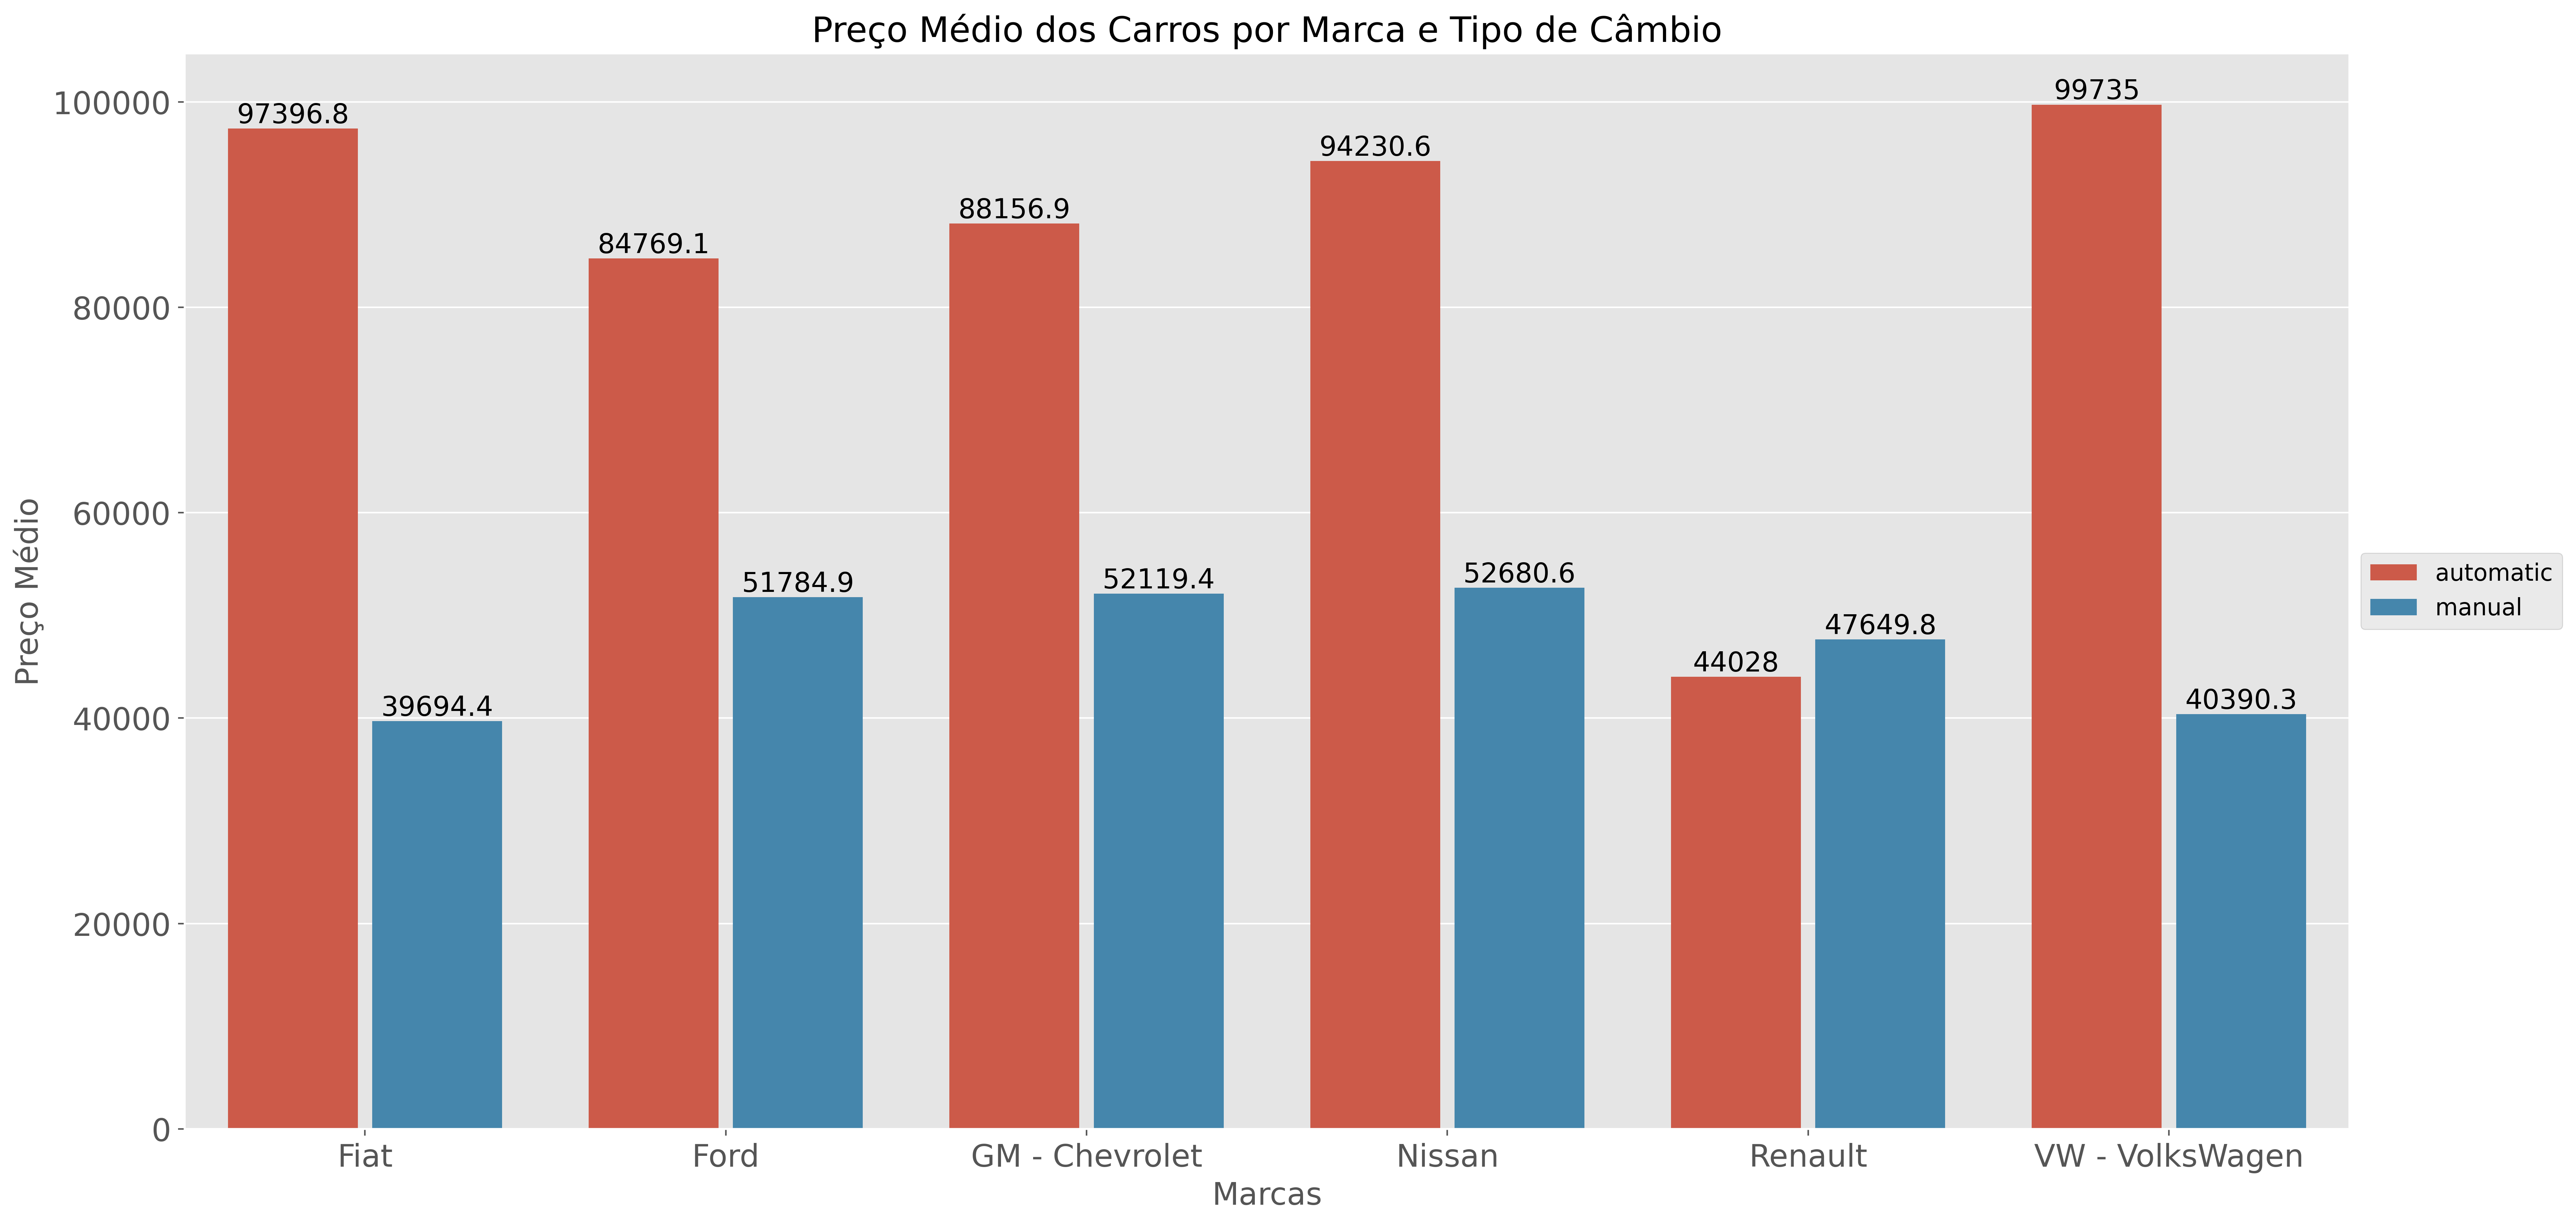

In [27]:
# visualizando a distribuição média de preço dos carros por marca e tipo de câmbio
plt.figure(figsize=(20,10))
ax = sns.barplot(x="brand", y="avg_price_brand_gear", hue="gear",
                 data=preco_marca_cambio, hue_order=preco_marca_cambio['gear'].unique(),
                 gap=0.1);

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=12)

ax.bar_label(ax.containers[0], fontsize=14);
ax.bar_label(ax.containers[1], fontsize=14);

plt.title("Preço Médio dos Carros por Marca e Tipo de Câmbio", fontsize=18)
# renomeando os eixos
plt.ylabel("Preço Médio", fontsize=16)
plt.xlabel("Marcas", fontsize=16)

# aumenta tamanho fonte dos eixos
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);


e) Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item d

O preço médio do carro com câmbio automático é relativamente mais alto quando comparado aos de câmbio manual para todas as marcas, com exceção da Renault. VolksWagen e Fiat lideram as marcas que possuem maior preço médio para carros de câmbio automático, ao passo que lideram também as marcas com menor preço médio dos carros com câmbio manual.

f) Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

In [28]:
# distribuição da média de preço dos carros por marca e tipo de combustível
preco_marca_combustivel = dados.groupby(['brand','fuel'])['avg_price_brl'].mean()
preco_marca_combustivel.head()

brand  fuel    
Fiat   Alcohol     11509.514419
       Diesel      99814.451429
       Gasoline    37197.294483
Ford   Alcohol     10148.906667
       Diesel      94522.454826
Name: avg_price_brl, dtype: float64

In [29]:
# resetando index
preco_marca_combustivel = preco_marca_combustivel.reset_index(name="avg_price_brand_fuel")
preco_marca_combustivel.head()

,brand,fuel,avg_price_brand_fuel
0,Fiat,Alcohol,11509.514419
1,Fiat,Diesel,99814.451429
2,Fiat,Gasoline,37197.294483
3,Ford,Alcohol,10148.906667
4,Ford,Diesel,94522.454826


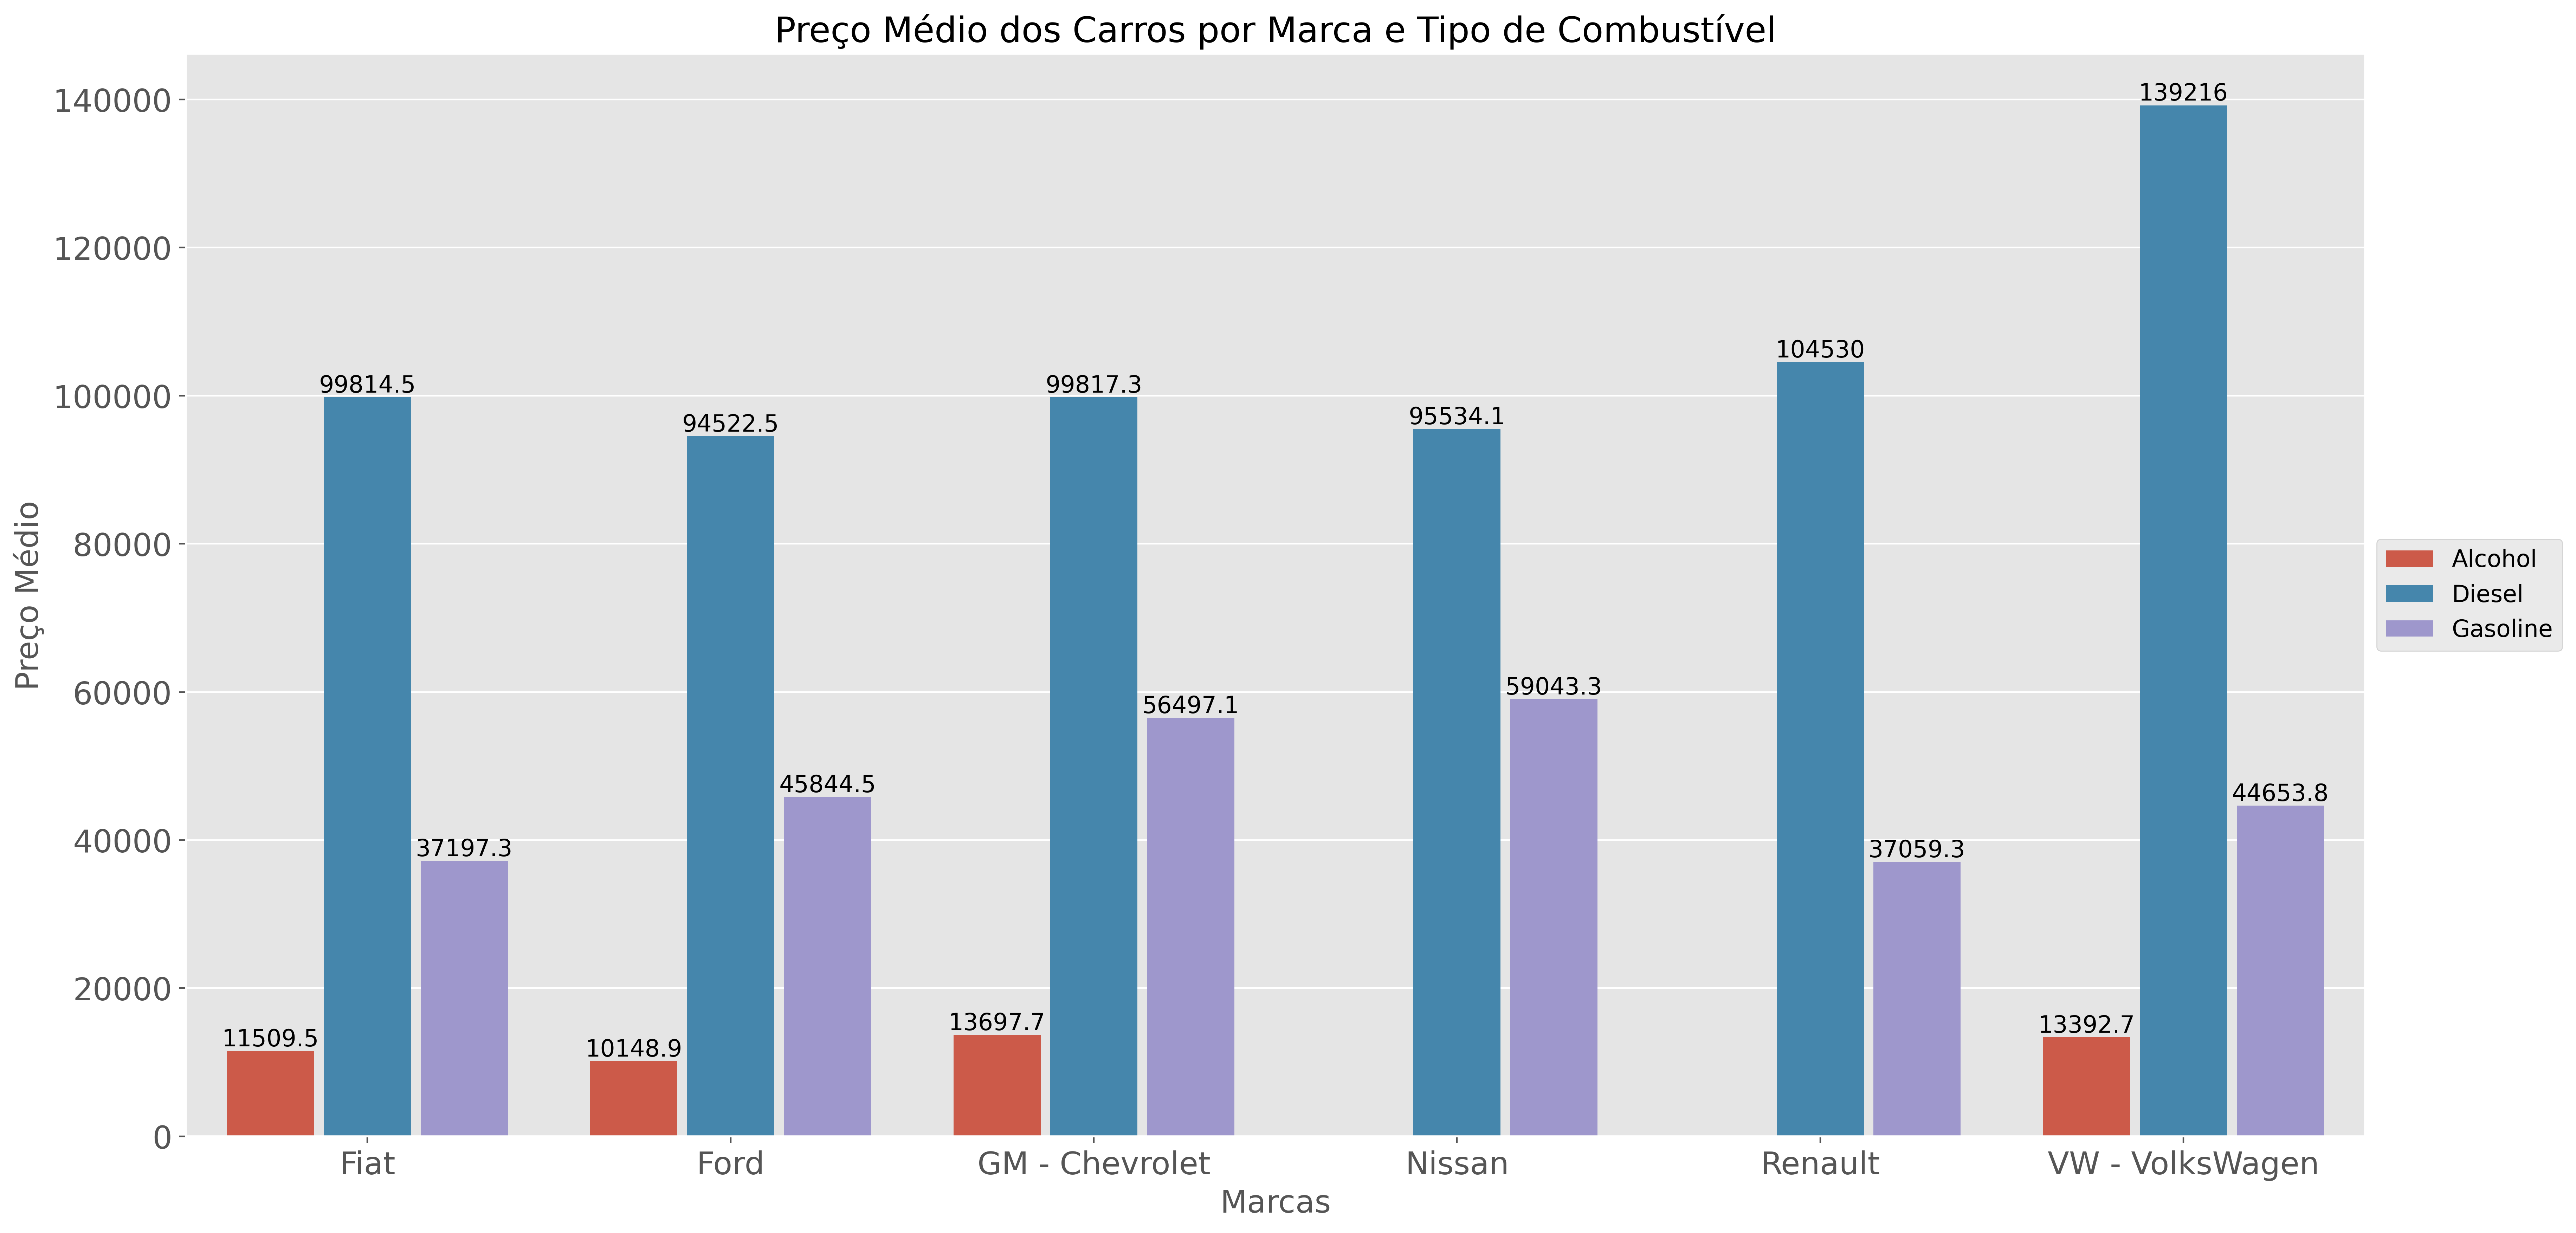

In [30]:
# visualizando a distribuição da média de preço dos carros por marca e tipo de combustível

plt.figure(figsize=(20,10))
ax = sns.barplot(x="brand", y="avg_price_brand_fuel", hue="fuel",
                 data=preco_marca_combustivel, hue_order=preco_marca_combustivel['fuel'].unique(),
                 gap=0.1);

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=12)

for c in range(len(ax.containers)):
    ax.bar_label(ax.containers[c], fontsize=12);

plt.title("Preço Médio dos Carros por Marca e Tipo de Combustível", fontsize=18)
# renomeando os eixos
plt.ylabel("Preço Médio", fontsize=16)
plt.xlabel("Marcas", fontsize=16)

# aumenta tamanho fonte dos eixos
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

g) Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item f

1. O preço médio do carro à diesel é muito mais elevado para todas as marcas, sendo a VolksWagen a marca com maior preço médio para esta categoria. 
2. O preço médio do carro à álcool lidera com os menores valores.
3. Os carros à gasolina com menor preço médio são das marcas Fiat e Renault.

---
# Predição do Preço Médio dos Carros com Machine Learning


a) Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo.A variável target é avg_price. Observação: caso julgue necessário, faça a transformação de variáveis categóricas em variáveis numéricas para inputar no modelo. Indique quais variáveis foram transformadas e como foram transformadas.

In [31]:
dados.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [32]:
print(dados.dtypes)

year_of_reference      float64
month_of_reference    category
fipe_code               object
authentication          object
brand                   object
model                   object
fuel                    object
gear                    object
engine_size             object
year_model             float64
avg_price_brl          float64
dtype: object


As variáveis independentes selecionadas e que, a princípio, podem ser importantes para predição foram:

1. *brand*
2. *model*
3. *fuel*
4. *gear*
5. *engine_size*
6. *year_model*
7. *year_of_reference*
8. *month_of_reference*

A variável dependente ou target é:

1. *avg_price_brl*

- Visualizando a distribuíção da variável dependente.

Text(0.5, 1.0, 'Distribuição dos Preços')

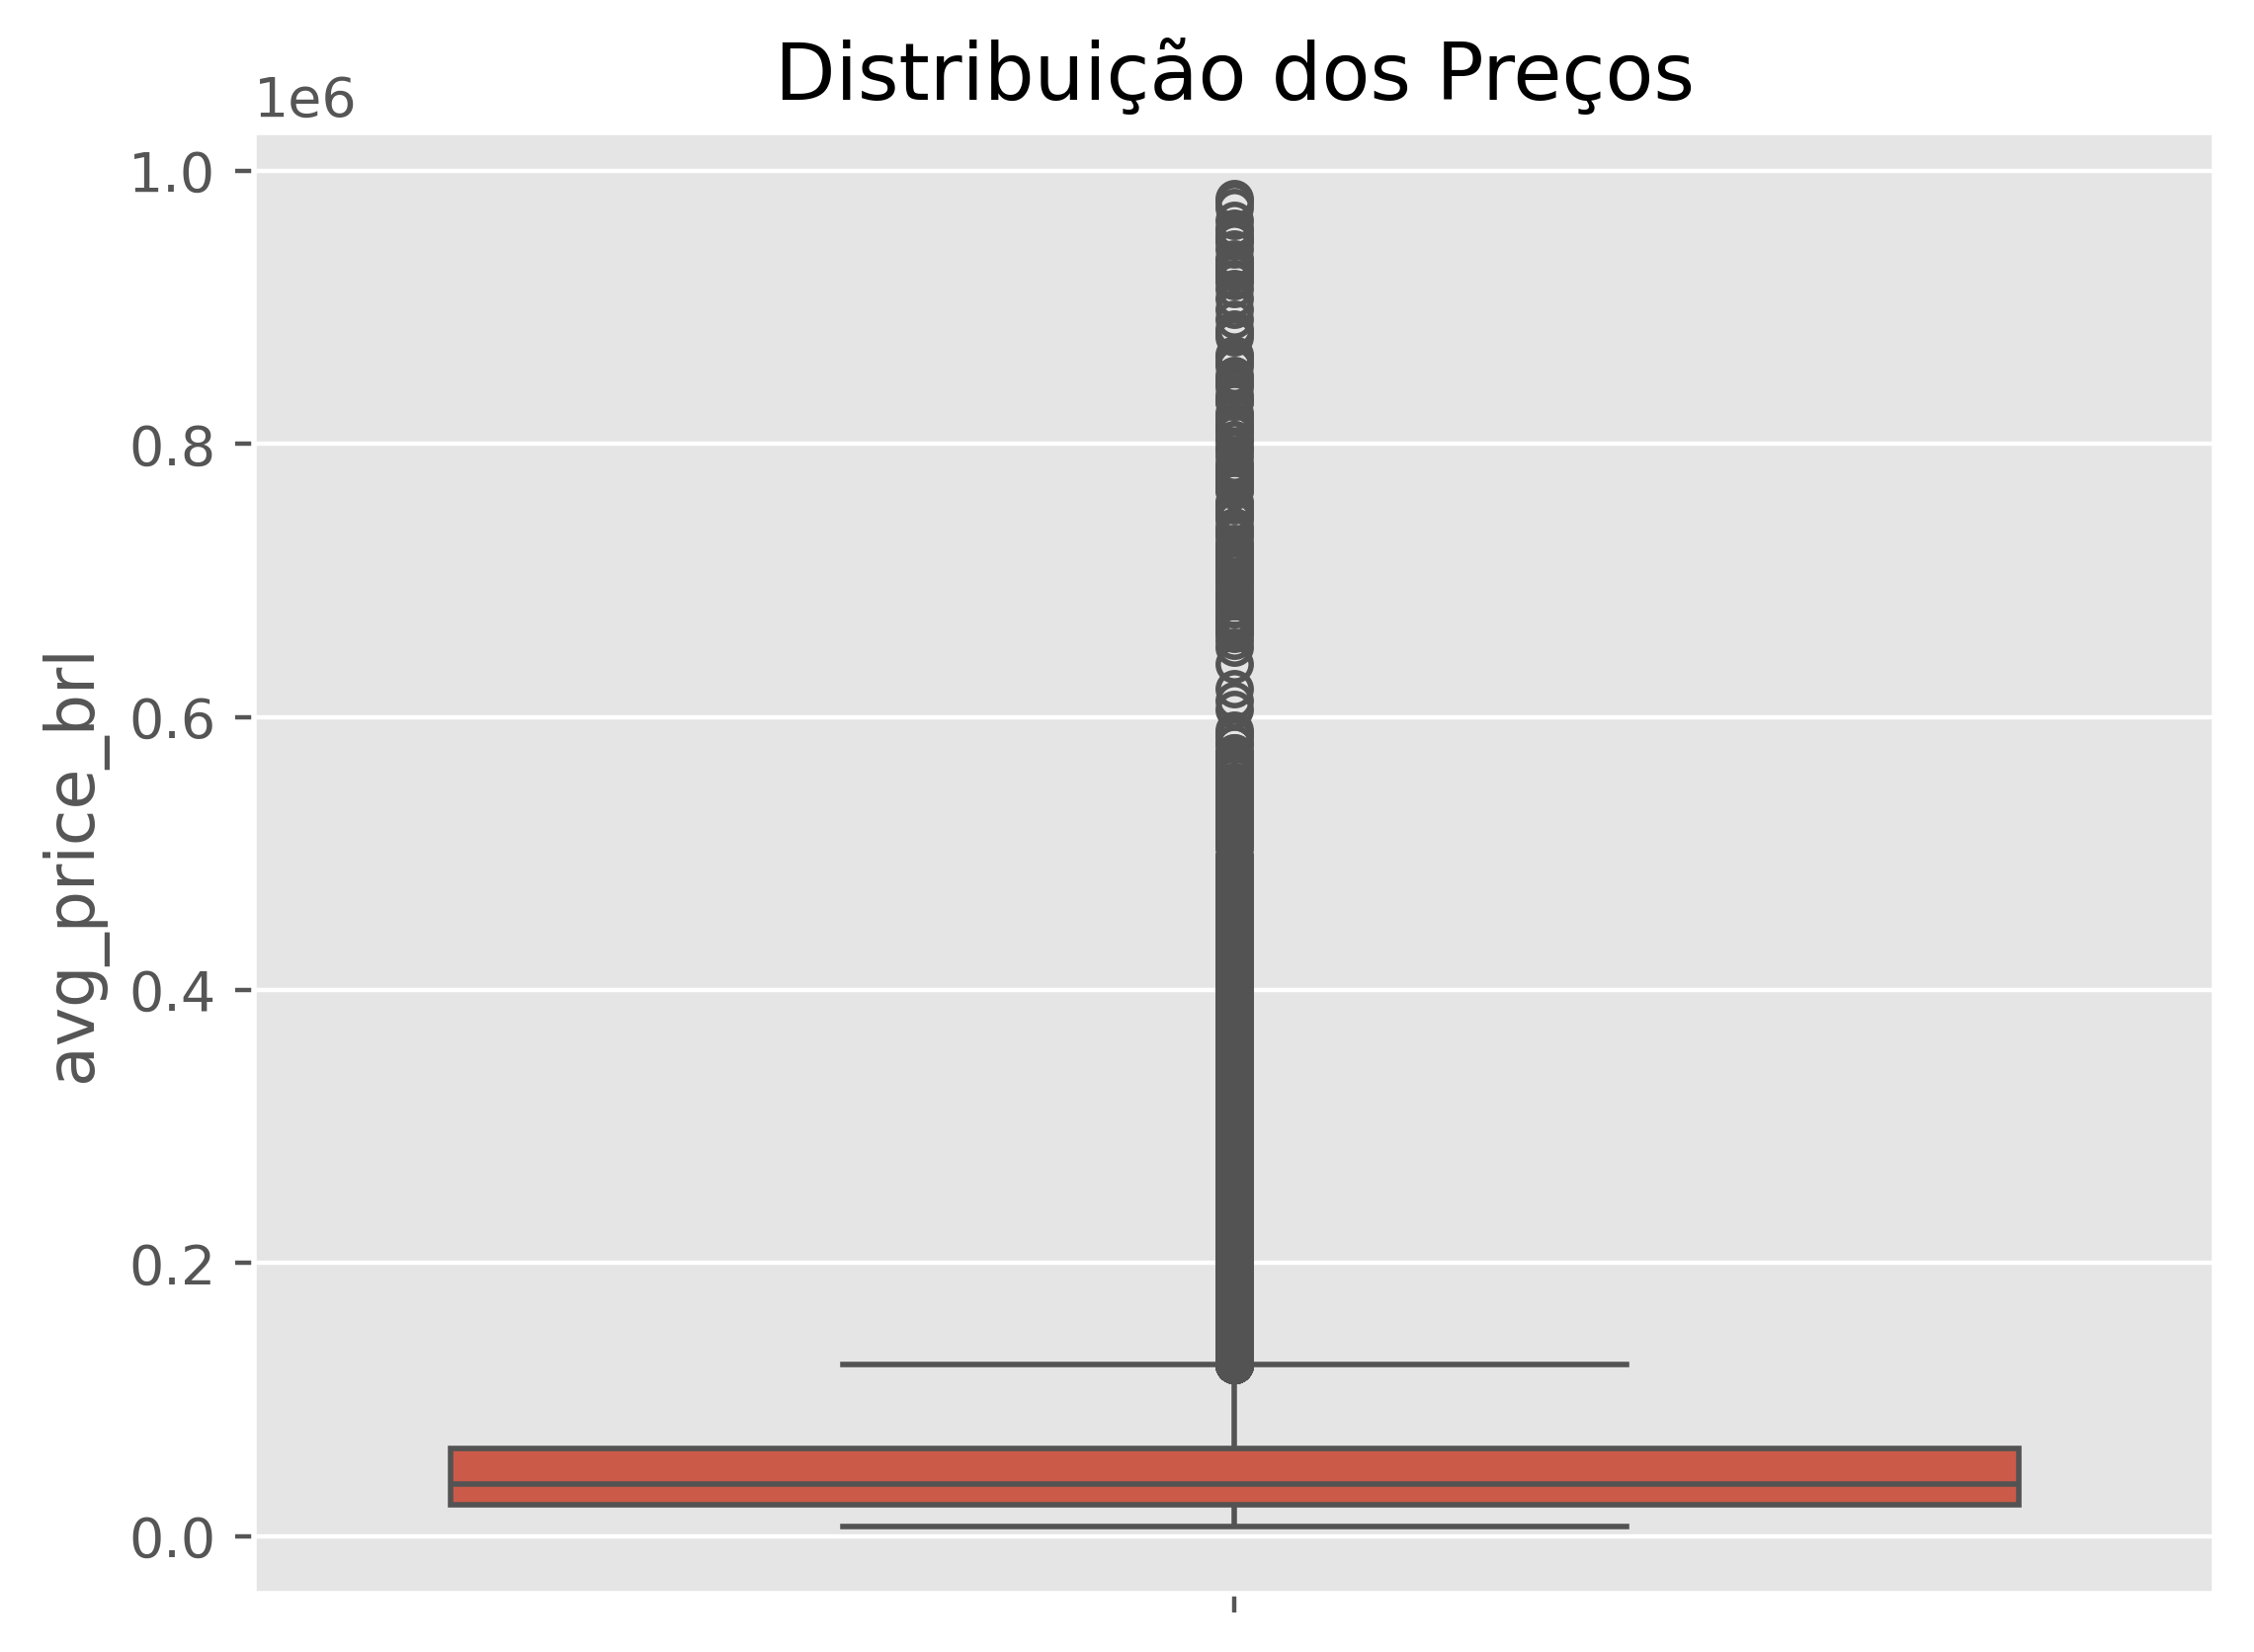

In [33]:
# analisando a varável target
sns.boxplot(dados['avg_price_brl']).set_title("Distribuição dos Preços")

O boxplot evidencia a presença de muitos outliers, no entanto, nenhuma forma de tratamento destes outliers será aplicada para este trabalho.


## Pré-processamento dos dados

In [34]:
# selecionando variáveis de interesse
dados_vi = dados[['brand', 'model', 'fuel', 'gear', 'month_of_reference', 'engine_size', 'year_model', 'year_of_reference', 'avg_price_brl']]
dados_vi


,brand,model,fuel,gear,month_of_reference,engine_size,year_model,year_of_reference,avg_price_brl
0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,January,1,2002.0,2021.0,9162.0
1,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,January,1,2001.0,2021.0,8832.0
2,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,January,1,2000.0,2021.0,8388.0
3,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,January,1,2000.0,2021.0,8453.0
4,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,January,"1,6",2001.0,2021.0,12525.0
...,...,...,...,...,...,...,...,...,...
202292,VW - VolksWagen,Saveiro Robust 1.6 Total Flex 16V,Gasoline,manual,January,"1,6",2023.0,2023.0,86038.0
202293,VW - VolksWagen,Gol Last Edition 1.0 Flex 12V 5p,Gasoline,manual,January,1,2023.0,2023.0,95997.0
202294,VW - VolksWagen,Gol Last Edition 1.0 Flex 12V 5p,Gasoline,manual,January,1,2023.0,2023.0,87828.0
202295,VW - VolksWagen,Polo Track 1.0 Flex 12V 5p,Gasoline,manual,January,1,2023.0,2023.0,80845.0


In [35]:
# transformando engine_size em variável contínua.
dados_vi['engine_size'] = dados_vi['engine_size'].apply(lambda x: x.replace(',','.')) # substitui a vírgula pelo ponto em valores decimais
dados_vi['engine_size'] = dados_vi['engine_size'].astype(float)                       # transforma dados de str para float
dados_vi

,brand,model,fuel,gear,month_of_reference,engine_size,year_model,year_of_reference,avg_price_brl
0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,January,1.0,2002.0,2021.0,9162.0
1,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,January,1.0,2001.0,2021.0,8832.0
2,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,January,1.0,2000.0,2021.0,8388.0
3,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,January,1.0,2000.0,2021.0,8453.0
4,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,January,1.6,2001.0,2021.0,12525.0
...,...,...,...,...,...,...,...,...,...
202292,VW - VolksWagen,Saveiro Robust 1.6 Total Flex 16V,Gasoline,manual,January,1.6,2023.0,2023.0,86038.0
202293,VW - VolksWagen,Gol Last Edition 1.0 Flex 12V 5p,Gasoline,manual,January,1.0,2023.0,2023.0,95997.0
202294,VW - VolksWagen,Gol Last Edition 1.0 Flex 12V 5p,Gasoline,manual,January,1.0,2023.0,2023.0,87828.0
202295,VW - VolksWagen,Polo Track 1.0 Flex 12V 5p,Gasoline,manual,January,1.0,2023.0,2023.0,80845.0


As variáveis categóricas *brand*, *model*, *fuel*, *month_of_reference* e *gear* serão transformadas em variáveis numéricas por meio da técnica label encoding.

In [36]:
# transformando as variáveis categóricas
le = LabelEncoder()
columns = ['brand', 'model', 'fuel', 'month_of_reference', 'gear']
for column in columns:
    dados_vi[column] = le.fit_transform(dados_vi[column])

dados_vi.head()

,brand,model,fuel,gear,month_of_reference,engine_size,year_model,year_of_reference,avg_price_brl
0,2,297,2,1,4,1.0,2002.0,2021.0,9162.0
1,2,297,2,1,4,1.0,2001.0,2021.0,8832.0
2,2,297,2,1,4,1.0,2000.0,2021.0,8388.0
3,2,297,0,1,4,1.0,2000.0,2021.0,8453.0
4,2,260,2,1,4,1.6,2001.0,2021.0,12525.0


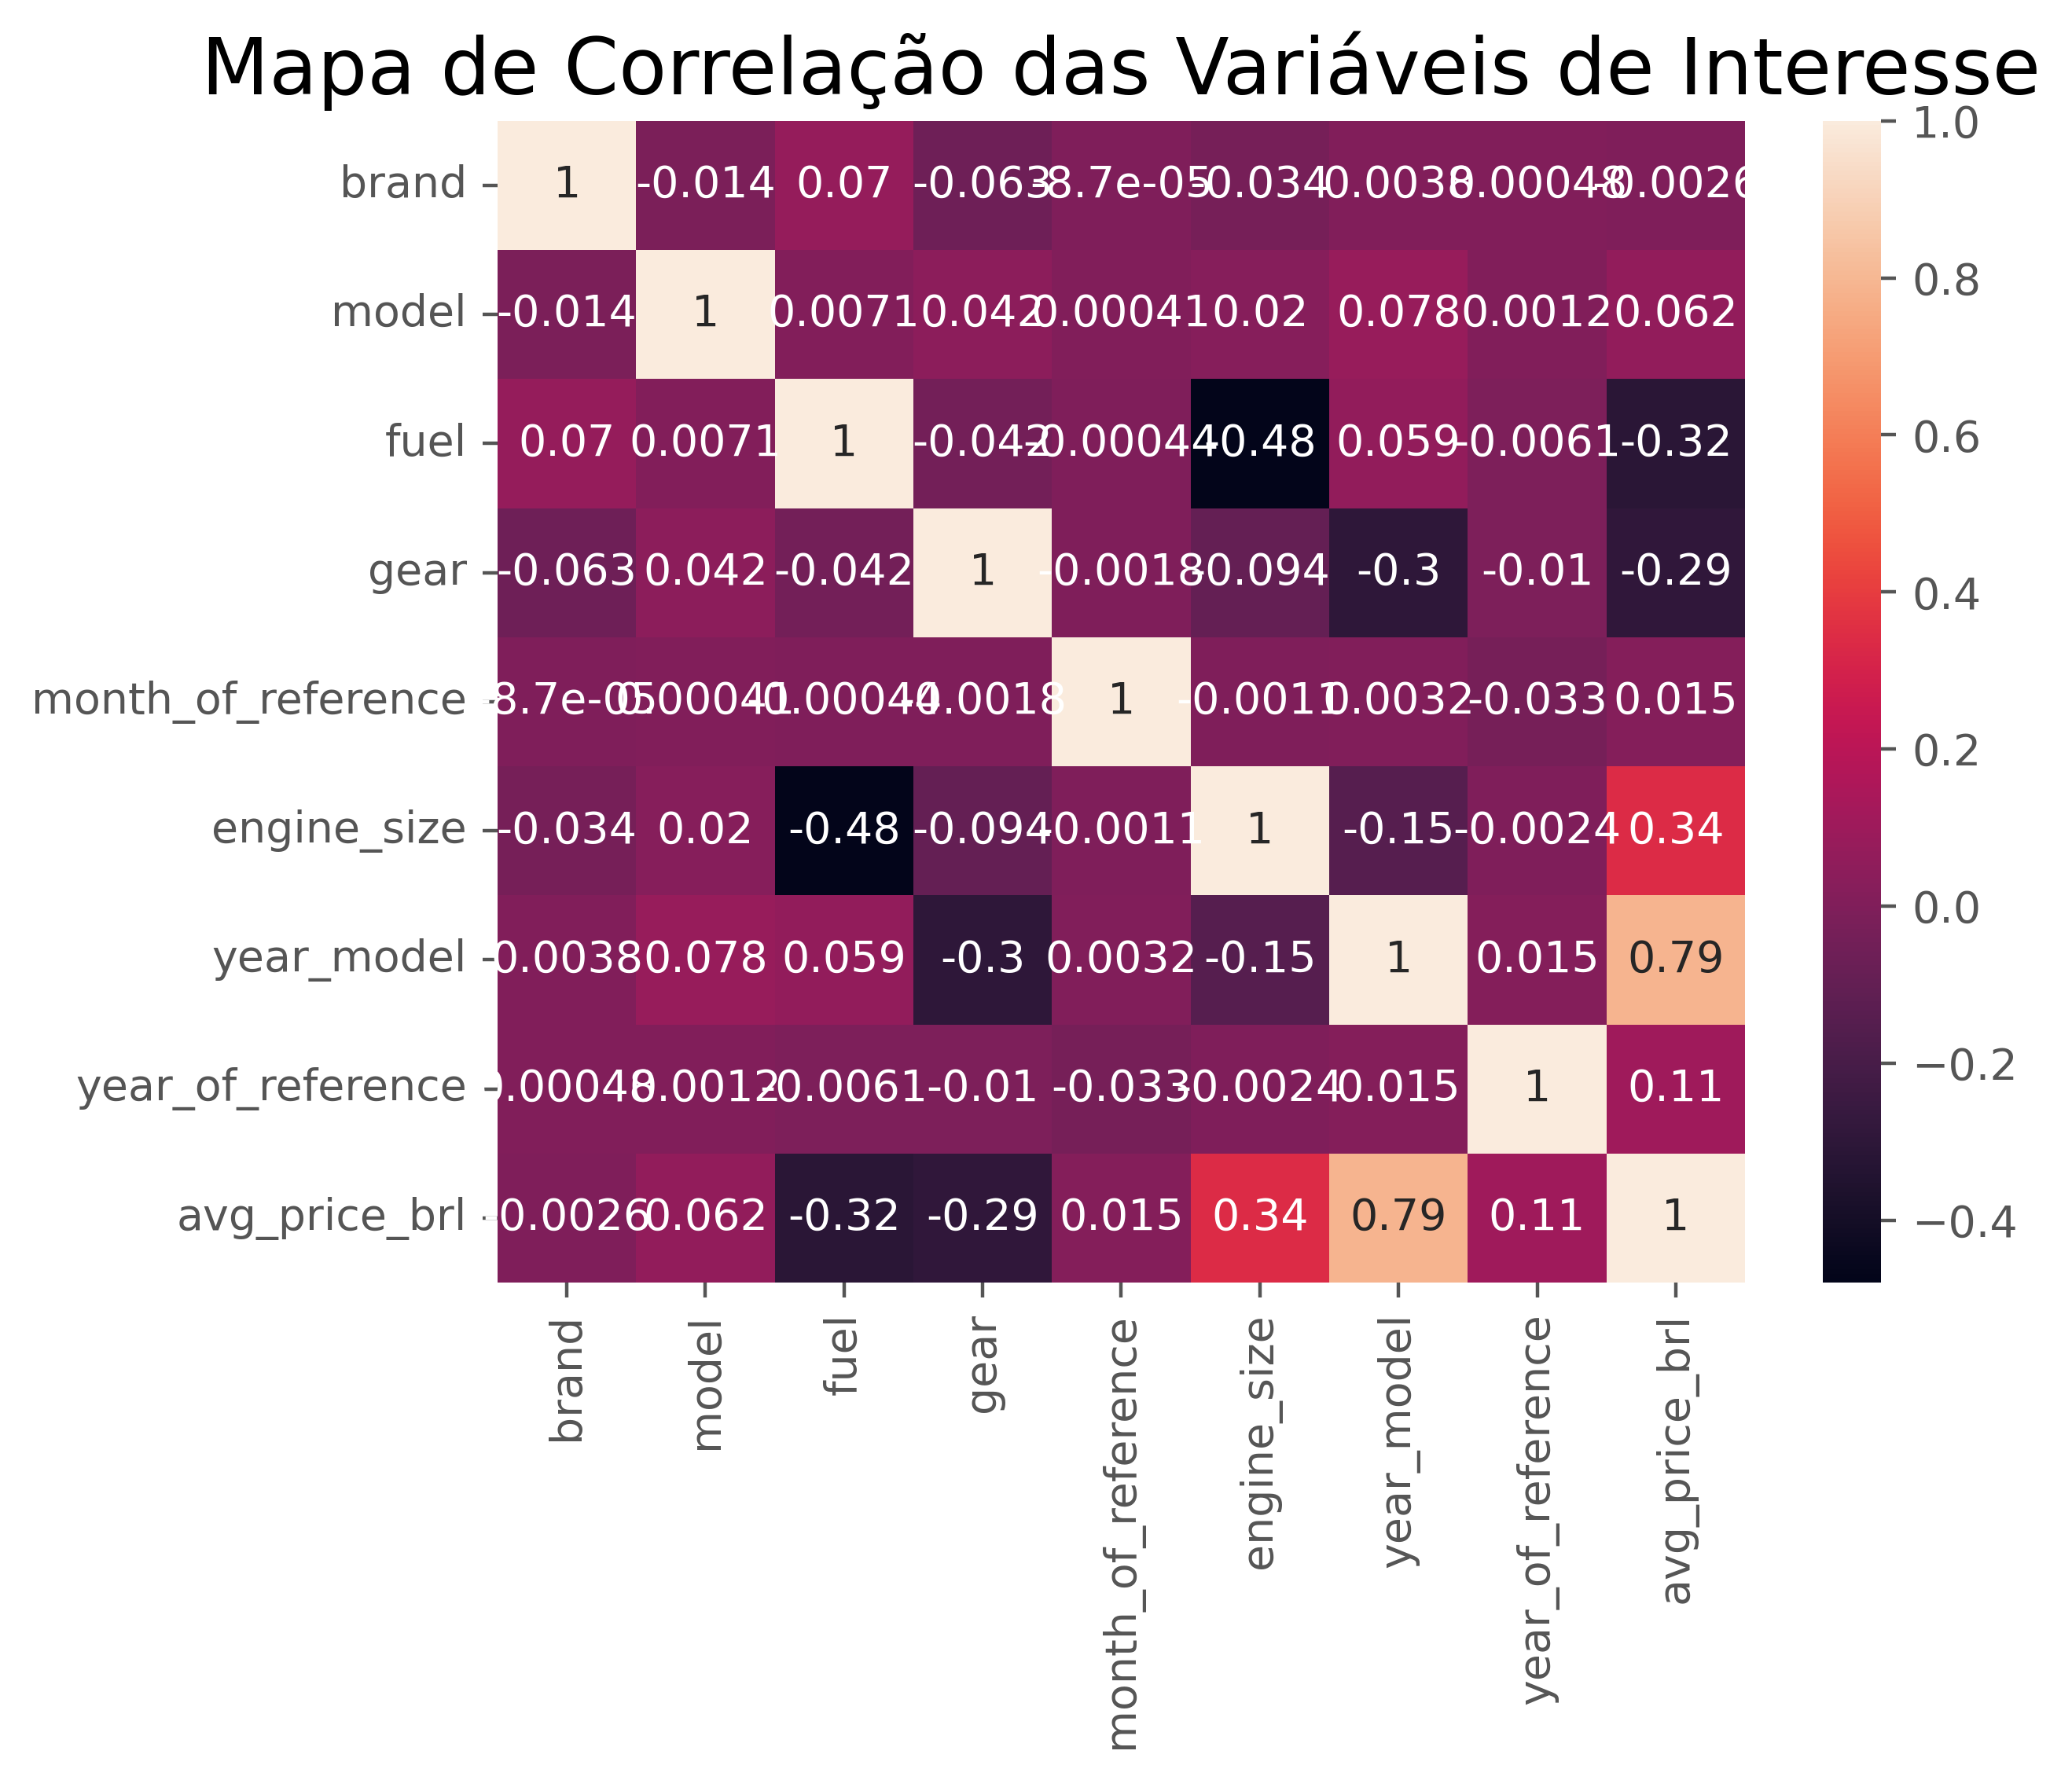

In [37]:
# Mapa de correlação das variáveis com a variavel objetivo
sns.heatmap(dados_vi.corr('spearman'), annot=True)
plt.title("Mapa de Correlação das Variáveis de Interesse", fontsize=18)
plt.show()

O mapa de correlação mostra uma correlação positiva com a variável target (avg_price_brl) mais evidente entre as variáveis *engine_size*, *year_model* e *year_of_reference*. Além disso, uma correlação negativa com a variável target está mais acentuada entre as variáveis *fuel* e *gear*. As varáveis *brand*, *model* e *month_of_reference* apresentam correlação muito baixas com a variável target.

## Separando os conjuntos de treinamento e testes

In [38]:
# conjunto de variáveis dependentes
X = dados_vi.drop(['avg_price_brl'], axis=1)
X

,brand,model,fuel,gear,month_of_reference,engine_size,year_model,year_of_reference
0,2,297,2,1,4,1.0,2002.0,2021.0
1,2,297,2,1,4,1.0,2001.0,2021.0
2,2,297,2,1,4,1.0,2000.0,2021.0
3,2,297,0,1,4,1.0,2000.0,2021.0
4,2,260,2,1,4,1.6,2001.0,2021.0
...,...,...,...,...,...,...,...,...
202292,5,1678,2,1,4,1.6,2023.0,2023.0
202293,5,720,2,1,4,1.0,2023.0,2023.0
202294,5,720,2,1,4,1.0,2023.0,2023.0
202295,5,1374,2,1,4,1.0,2023.0,2023.0


In [39]:
# conjunto da variável independente
Y = dados_vi['avg_price_brl']
Y

0          9162.0
1          8832.0
2          8388.0
3          8453.0
4         12525.0
           ...   
202292    86038.0
202293    95997.0
202294    87828.0
202295    80845.0
202296    74458.0
Name: avg_price_brl, Length: 202297, dtype: float64

b) Crie partições contendo 75% dos dados para treino e 25% para teste. 

In [40]:
# separando conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [41]:
print(X_train.shape)
X_train.head()

(151722, 8)


,brand,model,fuel,gear,month_of_reference,engine_size,year_model,year_of_reference
93757,4,235,2,1,2,1.0,2006.0,2021.0
43313,1,549,2,1,6,2.0,2008.0,2021.0
114971,0,385,1,1,7,2.3,2014.0,2022.0
69992,4,970,2,1,11,1.0,2019.0,2021.0
125123,1,898,2,1,0,1.0,2017.0,2022.0


In [42]:
print(X_test.shape)
X_test.head()

(50575, 8)


,brand,model,fuel,gear,month_of_reference,engine_size,year_model,year_of_reference
180634,0,1235,2,1,9,1.6,2014.0,2022.0
13130,4,224,2,1,3,1.0,2005.0,2021.0
163316,0,347,2,1,11,1.8,2006.0,2022.0
121463,2,1114,2,1,0,1.8,2009.0,2022.0
14044,4,310,2,0,3,1.6,2019.0,2021.0


In [43]:
print(Y_train.shape)
Y_train

(151722,)


93757      15988.0
43313      20343.0
114971    100882.0
69992      45660.0
125123     48114.0
            ...   
119879     43524.0
103694     41292.0
131932    109698.0
146867     19669.0
121958     58922.0
Name: avg_price_brl, Length: 151722, dtype: float64


## Treinamento dos Modelos


c) Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique quais parâmetros foram inputados e indique o treinamento de cada modelo.

### Random Forest

In [44]:
# random forest sem especificação dos parâmetros
modelo_rf = RandomForestRegressor()

In [45]:
# ajuste do modelo
modelo_rf.fit(X_train, Y_train)

RandomForestRegressor()

### XGBoost

In [46]:
modelo_xgb = XGBRegressor()

In [47]:
# ajuste do modelo
modelo_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Predição

d) Grave os valores preditos em variáveis criadas.

In [48]:
# predição com o conjunto de teste para o modelo random forest
rf_pred = modelo_rf.predict(X_test)

In [49]:
# predição com o conjunto de teste para o modelo XGBoost
xgb_pred = modelo_xgb.predict(X_test)

e) Realize a análise de importância das variáveis para estimar a variável target, para cada modelo treinado.


In [50]:
# análise de importância das variáveis para random forest
importancias = modelo_rf.feature_importances_
feature_importances = pd.DataFrame(importancias, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
engine_size,0.451778
year_model,0.389747
model,0.056687
gear,0.035537
fuel,0.032528
brand,0.016648
year_of_reference,0.011885
month_of_reference,0.005191


In [51]:
# análise de importância das variáveis para XGBoost
importancias_xgb = modelo_xgb.feature_importances_
feature_importances = pd.DataFrame(importancias_xgb, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
engine_size,0.435348
year_model,0.195835
fuel,0.158462
gear,0.118475
brand,0.048336
model,0.022392
year_of_reference,0.016808
month_of_reference,0.004343


f) Dê uma breve explicação (máximo de quatro linhas) sobre os resultados encontrados na análise de importância de variáveis

A análise de importância para *Random Forest* mostra que *engine_size* e *year_model* foram as variáveis mais importantes para o modelo *Random Forest*. As demais variáveis possuem grau de importância muito baixos para o desempenho geral do modelo. 
Já para o modelo *XGBoost*, *engine_size* foi as variável mais importante. O modelo *XGBoost* diminuiu a importância de *year_model*, ao passo que aumentou a importância de *fuel*, *gear* e *brand*.

#### Metricas de Acurácia

- Métricas para *Random Forest*

In [52]:
mse = mean_squared_error(Y_test, rf_pred)
mae = mean_absolute_error(Y_test, rf_pred)
r2  = r2_score(Y_test, rf_pred)
print(f'MSE: {mse} \nMAE: {mae}\nR2:  {r2}')

MSE: 11781144.636702409 
MAE: 1724.3928207437484
R2:  0.9955591919152882


- Métricas para *XGBoost*

In [53]:
mse = mean_squared_error(Y_test, xgb_pred)
mae = mean_absolute_error(Y_test, xgb_pred)
r2  = r2_score(Y_test, xgb_pred)
print(f'MSE: {mse} \nMAE: {mae}\nR2:  {r2}')

MSE: 30505966.213121794 
MAE: 3232.219402592839
R2:  0.9885010204382744


f) Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R2.

- O melhor modelo com base nas métricas MSE, MAE $R^2$ foi o *Random Forest*.



g) Dê uma breve explicação (máximo de quatro linhas) sobre qual modelo gerou o melhor resultado e a métrica de avaliação utilizada.

Após análise das métricas de desempenho dos modelos *Random Forest* e *XGBoost* podemos observar que ambos obtiveram bom desenpenho na predição para o conjunto de testes quando observa-se o valor de $R^2$, sendo:

- $R^2=0.99$ para *Random Forest*, e
- $R^2=0.98$ para *XGBoost*.

Mesmo com um diferença muito pequena, *Random Forest* obteve melhor desempenho.


